# Basic Analysis of Google Play Store Apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
apps = pd.read_csv("googleplaystore.csv")
#Data Cleaning
apps.dropna(inplace=True)
apps.drop_duplicates(inplace=True)
#Installs 
apps['Installs'].unique()
apps['Installs'] = apps['Installs'].str.replace(r'\D','').astype(float)
#Price
apps['Price'] = apps['Price'].str.replace('$','').astype(float) 
#Size
apps['Size'].unique()
apps['Size'].replace('Varies with device', np.nan, inplace = True ) 
apps['Size']=apps['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float)

## What category of applications have the highest number of installs?

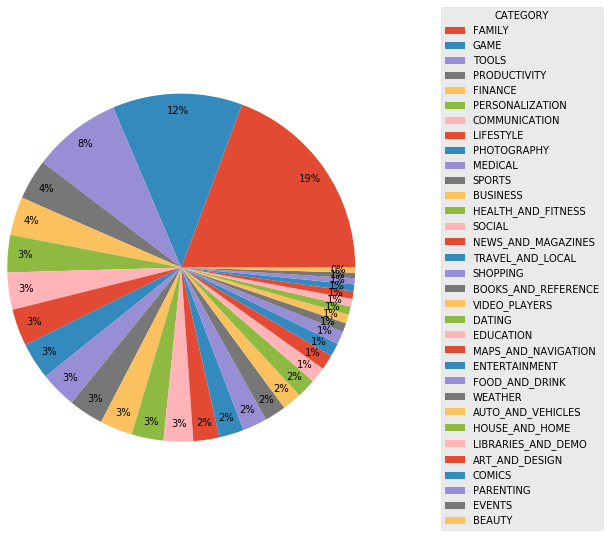

In [16]:
#Applications per Category
apps_count = apps.Category.value_counts() .sort_values(ascending = False)
apps_count.plot(labels=None, kind='pie',startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=2)
plt.ylabel('')
plt.legend(title='CATEGORY',labels=apps_grouped3.index, loc='right', bbox_to_anchor=(1.5,0.5), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()
plt.close()

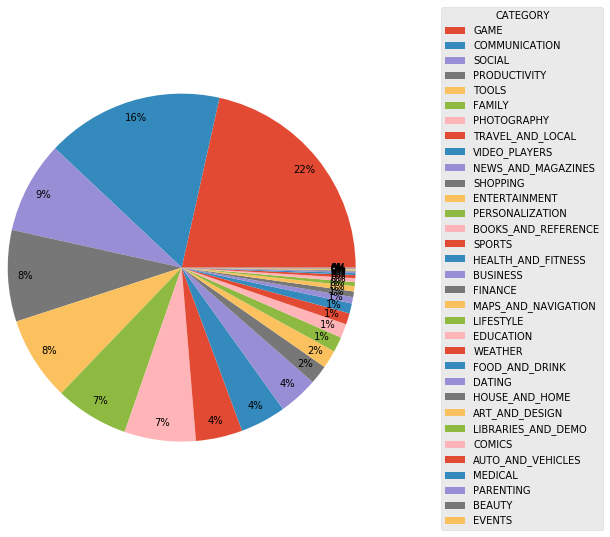

In [19]:
#Installs per Category
apps_grouped = apps.groupby('Category')['Installs'].sum() .sort_values(ascending = False)
apps_grouped.plot(labels=None, kind='pie',startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=2)
plt.ylabel('')
plt.legend(title='CATEGORY',labels=apps_grouped3.index, loc='right', bbox_to_anchor=(1.5,0.5), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()
plt.close()

*Here, the category of applications with the highest number of installs are; Game, Communication and Social.*

## Does the price of the application affect the number of installs?

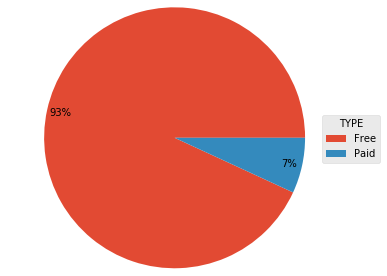

In [23]:
#Percentage of Free applications to Paid ones
apps_grouped2 = apps.groupby('Type')['Installs'].count() .sort_values(ascending = False).head(10)
plt.gca().axis("equal")
apps_grouped2.plot(kind='pie',labels=None, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.5)
plt.ylabel('')
plt.legend(title='TYPE',labels=apps_grouped2.index, loc='right', bbox_to_anchor=(1.0,0.5), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()
plt.close()

*Users tend to install free apps than paid ones*

Text(0.5, 1.0, 'Chart showing how Price affects the Number of Installs')

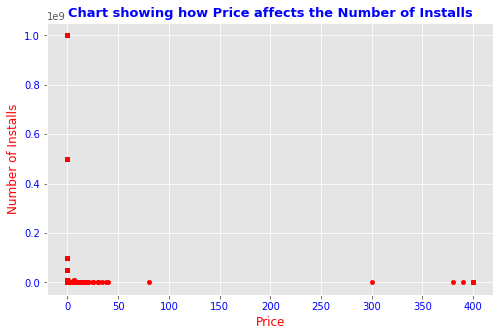

In [29]:
#Installs with price
plt.style.use('ggplot')
apps.plot(kind='scatter',x='Price',y='Installs',figsize= (8,5), color='red')
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Price', color='red', fontsize=12)
plt.ylabel('Number of Installs', color='red', fontsize=12)
plt.title('Chart showing how Price affects the Number of Installs', weight='bold', color='blue', fontsize=13)

*The Application should be free but if the developer decides to attach a price tag, it should be within the range of 0 – 2$.*

## Does Content Rating affect the number of installs?

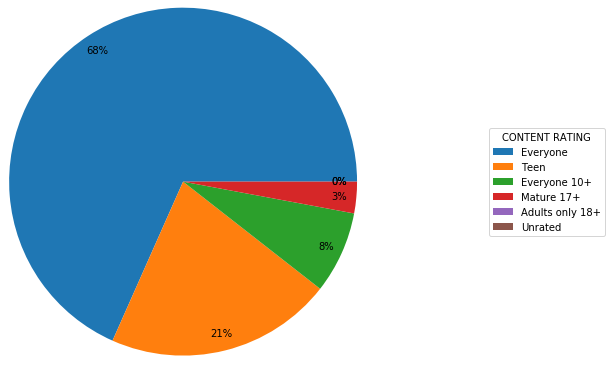

In [7]:
apps_grouped3 = apps.groupby('Content Rating')['Installs'].sum() .sort_values(ascending = False)
apps_grouped3.plot(labels=None, kind='pie',startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=2)
plt.ylabel('')
plt.legend(title='CONTENT RATING',labels=apps_grouped3.index, loc='right', bbox_to_anchor=(1.5,0.5), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()
plt.close()

*The "Everyone" and "Teen" Content rating have the highest number of installs*

Text(0.5, 1.0, 'Content rating per category')

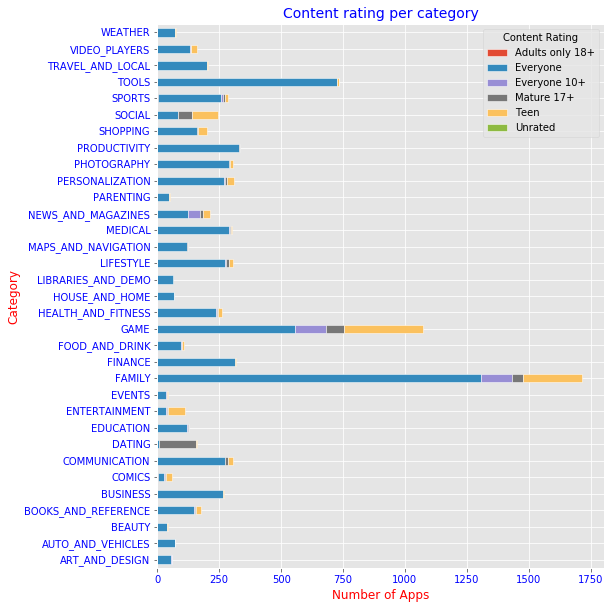

In [28]:
plt.style.use('ggplot')
apps_grouped = apps.groupby(['Category','Content Rating'])['Installs'].count().unstack()
apps_grouped.plot(kind='barh', stacked=True, figsize= (8,10), edgecolor= 'white') 
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Number of Apps', color='red', fontsize=12)
plt.ylabel('Category', color='red', fontsize=12)
plt.title('Content rating per category', color='blue', fontsize=14)